In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kinematics-motion-data/Kinematics_Data.csv


 Dataset contains a single file which represents 88588 sensor data samples collected from accelerometer and gyroscope.
 
 Activity type represented by "activity" column which acts as label and reflects following activities:

 - "0": walking
 - "1": running

- binary classification problem

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

In [3]:
data = pd.read_csv('/kaggle/input/kinematics-motion-data/Kinematics_Data.csv')
data.head(10)

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922
5,2017-6-30,13:51:17:46806991,viktor,0,0,0.4044,-0.8056,-0.0956,0.6925,-0.2179,2.5750
6,2017-6-30,13:51:17:246767997,viktor,0,0,0.6320,-1.1290,-0.2982,0.0548,-0.1896,0.4473
7,2017-6-30,13:51:17:446569025,viktor,0,0,0.6670,-1.3503,-0.0880,-0.8094,-0.7938,-1.4348
8,2017-6-30,13:51:17:646152973,viktor,0,0,0.2704,-0.8633,0.1293,-0.4173,-0.1904,-2.6759
9,2017-6-30,13:51:17:846502006,viktor,0,0,0.4690,-1.0740,0.0219,0.0388,1.1491,1.6982


In [4]:
data.shape

(88588, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            88588 non-null  object 
 1   time            88588 non-null  object 
 2   username        88588 non-null  object 
 3   wrist           88588 non-null  int64  
 4   activity        88588 non-null  int64  
 5   acceleration_x  88588 non-null  float64
 6   acceleration_y  88588 non-null  float64
 7   acceleration_z  88588 non-null  float64
 8   gyro_x          88588 non-null  float64
 9   gyro_y          88588 non-null  float64
 10  gyro_z          88588 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 7.4+ MB


In [6]:
data.describe()

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
count,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000
mean,0.522170,0.500801,-0.074811,-0.562585,-0.313956,0.004160,0.037203,0.022327
std,0.499511,0.500002,1.009299,0.658458,0.486815,1.253423,1.198725,1.914423
min,0.000000,0.000000,-5.350500,-3.299000,-3.753800,-4.430600,-7.464700,-9.480000
25%,0.000000,0.000000,-0.381800,-1.033500,-0.376000,-0.920700,-0.644825,-1.345125
50%,1.000000,1.000000,-0.059500,-0.759100,-0.221000,0.018700,0.039300,0.006900
75%,1.000000,1.000000,0.355500,-0.241775,-0.085900,0.888800,0.733700,1.398200
max,1.000000,1.000000,5.603300,2.668000,1.640300,4.874200,8.498000,11.266200


In [7]:
new_data = data.copy(deep = True)
new_data = new_data.drop(columns=['date','time', 'username'])
new_data.head(10)

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922
5,0,0,0.4044,-0.8056,-0.0956,0.6925,-0.2179,2.5750
6,0,0,0.6320,-1.1290,-0.2982,0.0548,-0.1896,0.4473
7,0,0,0.6670,-1.3503,-0.0880,-0.8094,-0.7938,-1.4348
8,0,0,0.2704,-0.8633,0.1293,-0.4173,-0.1904,-2.6759
9,0,0,0.4690,-1.0740,0.0219,0.0388,1.1491,1.6982


Lets visualize the data.

[Text(0, 0, 'Walking'), Text(1, 0, 'Running')]

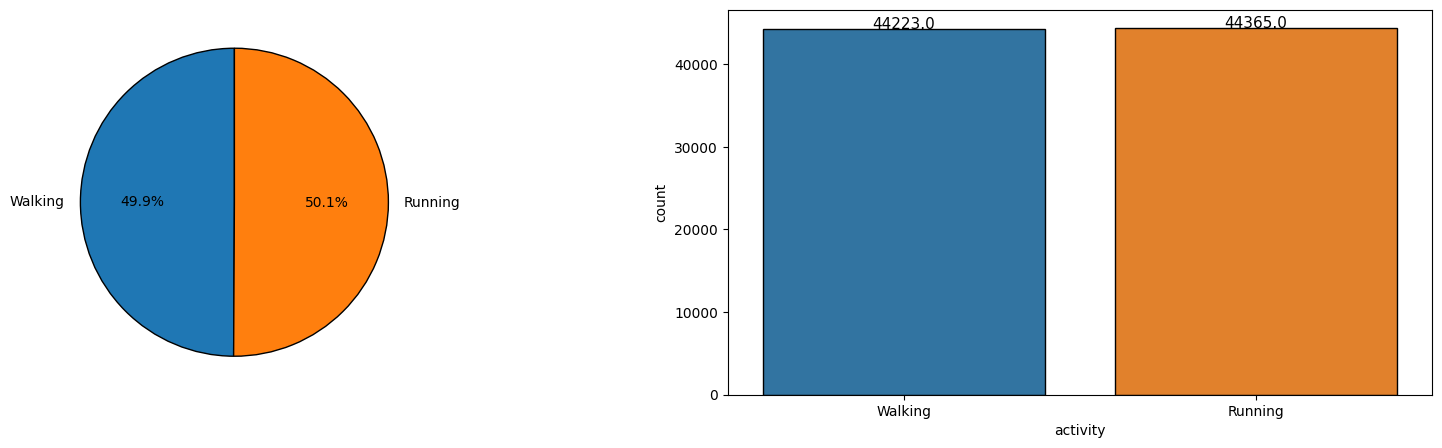

In [8]:
walking = len(data[data['activity'] == 0]) / len(new_data) * 100
running = len(data[data['activity'] == 1]) / len(new_data) * 100
activity_percentage = [walking,running]

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
plt.subplot(1,2,1)
plt.pie(activity_percentage,labels = ['Walking','Running'],autopct='%1.1f%%',startangle = 90,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})

plt.subplot(1,2,2)
ax = sns.countplot(x = 'activity',data = new_data,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)

ax.set_xticklabels(['Walking','Running'])

We do not have unbalanced data problem. This is great!!

Lets take a look in how the features are related with the target (activity).

- A heatmap of the correlation matrix can show how each feature correlates with the target variable. Positive correlations are usually represented by warmer colors (e.g., shades of red), while negative correlations are represented by cooler colors (e.g., shades of blue).

- PairPlot: A pairplot can be useful to visualize the relationships between pairs of features along with the distribution of each feature. You can color the points based on the target variable to see how it relates to different features. It's useful if you have few features.

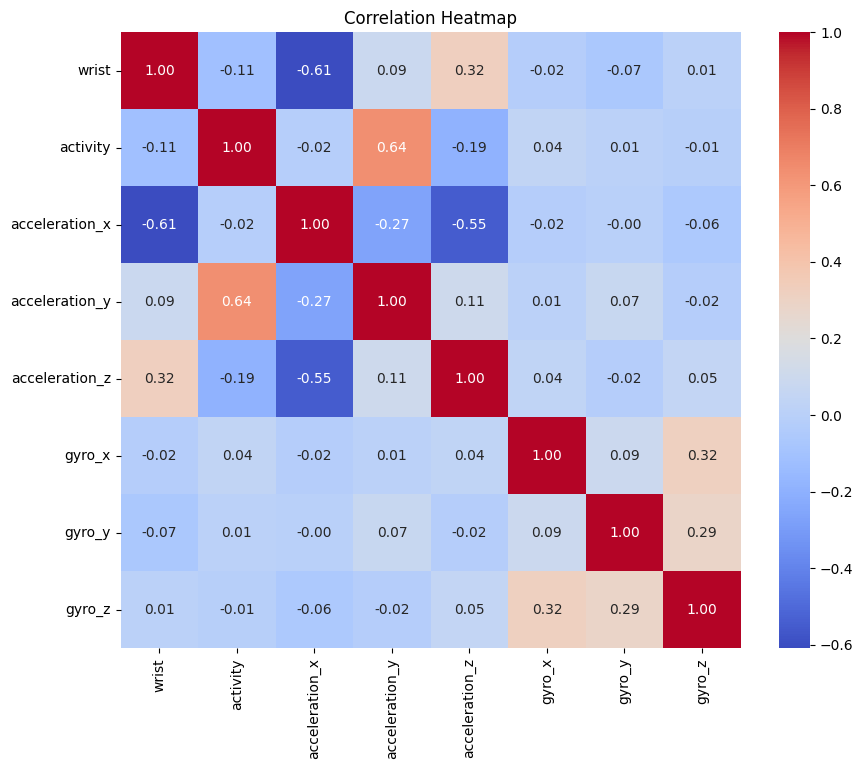

In [9]:
#Correlation Heatmap
correlation_matrix = new_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

- Apparently the variables 'acceleration_' are more related to 'activity'. 'giro_' variables are not strong correlated to 'activity'.

- Lets create a new dataset but dropping 'giro_' variables.  

- In this case, we will create 2 models based on features with 'gyro_' variable and without 'gyro_' variables.

- **The accuracy of these two models should be very similar**

**Dataset with 'giro_' variables rejected**

In [10]:
new_data2 = new_data.copy(deep = True)
new_data2 = new_data2.drop(columns=['gyro_x','gyro_y', 'gyro_z'])
new_data2.head()

,wrist,activity,acceleration_x,acceleration_y,acceleration_z
0,0,0,0.2650,-0.7814,-0.0076
1,0,0,0.6722,-1.1233,-0.2344
2,0,0,0.4399,-1.4817,0.0722
3,0,0,0.3031,-0.8125,0.0888
4,0,0,0.4814,-0.9312,0.0359


**Modeling**

- Its binary classification problem;

- I will use logistic regression from scikit-learning

In [11]:
y1 = new_data['activity']
X1 = new_data.drop('activity', axis= 1)

y2 = new_data2['activity']
X2 = new_data2.drop('activity', axis= 1 )

print(y1.shape)
print(X1.shape)
print(y2.shape)
print(X2.shape)

(88588,)
(88588, 7)
(88588,)
(88588, 4)


In [12]:
scaler = MinMaxScaler()
X1_norm = scaler.fit_transform(X1)
X2_norm = scaler.fit_transform(X2)

In [13]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1_norm, y1, test_size = 0.30, random_state = 2)
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2_norm, y2, test_size = 0.30, random_state = 2)

In [14]:
binaryModel1 = LogisticRegression()
binaryModel2 = LogisticRegression()

In [15]:
model1 = binaryModel1.fit(x_train1,y_train1)
scores1 = binaryModel1.score(x_test1,y_test1)
print(f"Scores model 1: {round(scores1*100)}%")

Scores model 1: 86%


In [16]:
model2 = binaryModel2.fit(x_train2,y_train2)
scores2 = binaryModel2.score(x_train2,y_train2)
print(f"Scores model 2: {round(scores2*100)}%")

Scores model 2: 86%


**Lets take a look at ways to evaluate our model.**

In [17]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn import metrics

In [18]:
#model 1 
y1_pred = binaryModel1.predict(x_test1)

print('accuracy model 1: ',metrics.accuracy_score(y_test1,y1_pred))
print('precision model 1: ',metrics.precision_score(y_test1,y1_pred))
print('recall model 1: ',metrics.recall_score(y_test1,y1_pred))

accuracy model 1:  0.8619859276818301
precision model 1:  0.9046805603006491
recall model 1:  0.8058429701765064


In [19]:
#model 2
y2_pred = binaryModel2.predict(x_test2)

print('accuracy model 2: ',metrics.accuracy_score(y_test2,y2_pred))
print('precision model 2: ',metrics.precision_score(y_test2,y2_pred))
print('recall model 2: ',metrics.recall_score(y_test2,y2_pred))

accuracy model 2:  0.8602551077999774
precision model 2:  0.902991452991453
recall model 2:  0.8037888009738283


**As we mentioned, ignoring factors related to 'gyro_' does not affect the model in any way.**

Confusion Matrix:


<Axes: >

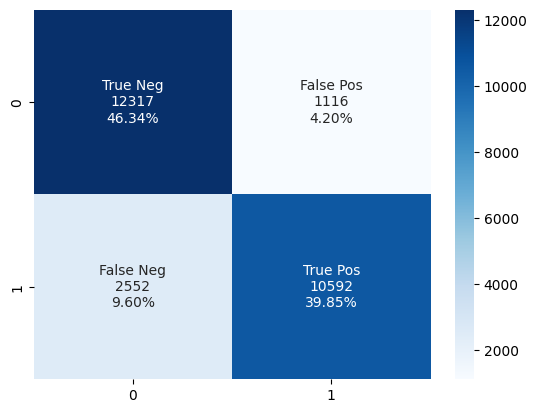

In [20]:
#accuracy_test = accuracy_score(y_test1, y1_pred)
#print(f'Accuracy: {accuracy_test}')
#print('\nClassification Report:\n', classification_report(y_test1, y1_pred))

cm = confusion_matrix(y_test1, y1_pred)
print("Confusion Matrix:")
names = ['True Neg','False Pos','False Neg','True Pos']
counts = [value for value in cm.flatten()]
percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')

In [21]:
#scores_model1 = cross_val_score(binaryModel1, x_train1, y_train1, cv=5, scoring='roc_auc')
#print('Cross-Validation Accuracy Scores model 1:', scores_model1)
#print('Mean Accuracy model 1:', np.mean(scores_model1))

#scores_model2 = cross_val_score(binaryModel2, x_train2, y_train2, cv=5, scoring='roc_auc')
#print('Cross-Validation Accuracy Scores model 1:', scores_model2)
#print('Mean Accuracy model 2:', np.mean(scores_model2))

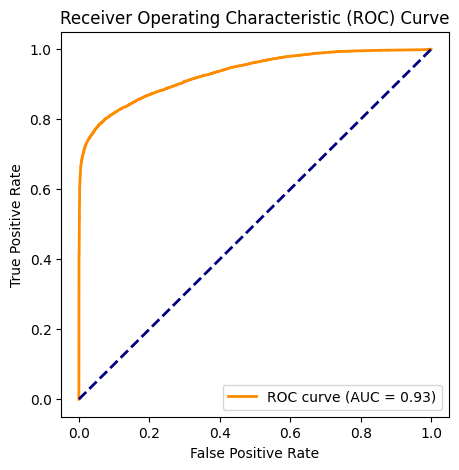

In [22]:
y1_pred_prob = binaryModel1.predict_proba(x_test1)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test1,y1_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()